# Principal Component Analysis - Ejemplo con Datos Sintéticos

## Creación de conjunto de datos sintéticos

El siguiente código, genera un conjunto de datos sintéticos sobre clientes de un sitio web de comercio electrónico. Estos datos incluyen:

* `CustomerID`: Identificador único para cada cliente.
* `Age`: Edad del cliente, que varía entre 18 y 70 años.
* `AnnualIncome`: Ingresos anuales del cliente, en un rango de 20,000 a 150,000.
* `SpendingScore`: Puntuación de gasto del cliente, entre 1 y 100.
* `SessionTime`: Tiempo de sesión en el sitio web, en minutos, entre 5 y 120.

In [1]:
# Librerías requeridas
import pandas as pd
import numpy as np

In [2]:
# Define una semilla para la generación de números aleatorios y facilitar reproducir la generación de datos.
np.random.seed(0)

# Define el número de muestras para el conjutos de datos
num_samples = 1000

# Generación del conjunto de datos sintéticos
data = {
    'CustomerID': np.arange(1, num_samples + 1),
    'Age': np.random.randint(18, 70, num_samples),  # Edades de 18 a 70
    'AnnualIncome': np.random.randint(20000, 150000, num_samples),  # Ingresos anuales desde 20 mil hasta 150 mil
    'SpendingScore': np.random.randint(1, 100, num_samples),  # Puntuación de gastos desde 1 a 100
    'SessionTime': np.random.uniform(5, 120, num_samples)  # Tiempo de sesión en minutos desde 5 hasta 120
}

# Creación de un DataFrame con los datos sintéticos
customer_df = pd.DataFrame(data)

# Despliega una muestra de los datos
customer_df.head(10)

,CustomerID,Age,AnnualIncome,SpendingScore,SessionTime
0,1,62,73478,46,27.597137
1,2,65,65560,50,8.436331
2,3,18,91592,23,31.010820
3,4,21,88246,93,76.508144
4,5,21,105022,66,34.686181
5,6,57,34591,86,83.049884
6,7,27,43059,67,112.822921
7,8,37,62756,33,34.505260
8,9,39,139444,51,93.990769
9,10,68,92554,71,80.458220


## Uso de PCA para Reducción de Dimensiones (Componentes Principales)

In [3]:
# Librerías necesarias para PCA
from sklearn.decomposition import PCA

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(customer_df)

# Despliega una muestra de los datos
components_2d[:10]

array([[-11043.44668477,   -499.29553826],
       [-18961.44704421,   -498.21956207],
       [  7070.55371581,   -497.28021042],
       [  3724.55270706,   -496.81033821],
       [ 20500.55274109,   -495.60267478],
       [-49930.4468197 ,   -494.51869104],
       [-41462.44605826,   -493.55673616],
       [-21765.44634877,   -492.20320983],
       [ 54922.55407748,   -491.85692696],
       [  8032.55355381,   -490.69379065]])

Text(0, 0.5, 'Componente 2')

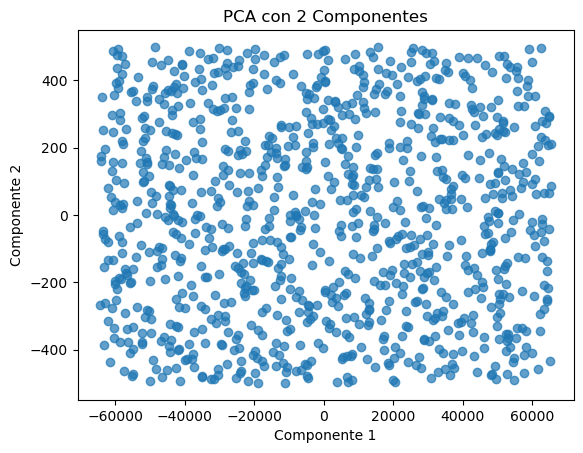

In [5]:
# Gráfica 2D de PCA2
plt.scatter(components_2d[:, 0], components_2d[:, 1], alpha=0.7)
plt.title('PCA con 2 Componentes')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

In [6]:
# PCA para 3 componentes
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(customer_df)

# Despliega una muestra de los datos
print(components_3d[:10])

[[-1.10434467e+04 -4.99295538e+02  3.72503043e+01]
 [-1.89614470e+04 -4.98219562e+02  5.64640701e+01]
 [ 7.07055372e+03 -4.97280210e+02  3.28564696e+01]
 [ 3.72455271e+03 -4.96810338e+02 -9.19231325e+00]
 [ 2.05005527e+04 -4.95602675e+02  3.15178046e+01]
 [-4.99304468e+04 -4.94518691e+02 -1.68223075e+01]
 [-4.14624461e+04 -4.93556736e+02 -4.74544733e+01]
 [-2.17654463e+04 -4.92203210e+02  2.94411951e+01]
 [ 5.49225541e+04 -4.91856927e+02 -2.78548576e+01]
 [ 8.03255355e+03 -4.90693791e+02 -1.40188525e+01]]


Text(0.5, 0, 'Componente 3')

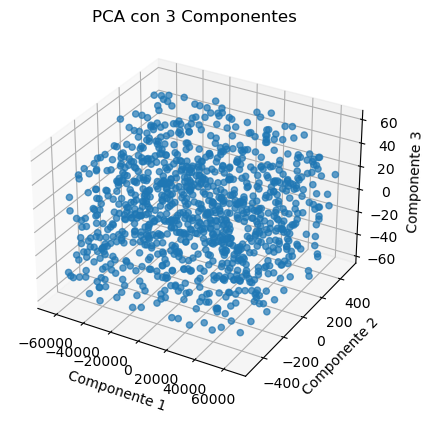

In [7]:
# Plotting the 3D PCA results
ax = plt.subplot(projection='3d')
ax.scatter(components_3d[:, 0], components_3d[:, 1], components_3d[:, 2], alpha=0.7)
ax.set_title('PCA con 3 Componentes')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

### Comparación entre 2 y 3 Componentes Principales

La comparación entre usar 2 o 3 componentes principales en el PCA se puede entender a través de la varianza explicada por cada componente y la varianza acumulada.

**Varianza Explicada**

Imagina que tienes un conjunto de datos con varias características o dimensiones (como altura, peso, edad en un conjunto de datos de salud). Cada una de estas características tiene su propia variabilidad. Cuando realizas PCA, estás combinando estas características de diferentes maneras para crear "componentes principales", que son nuevas características que capturan la información más importante de tus datos originales.

La varianza explicada se refiere a cuánta variabilidad de tus datos originales es capturada o explicada por cada uno de estos componentes principales. Si un componente principal tiene una alta varianza explicada, significa que captura una gran parte de la información (variabilidad) de tus datos.

**Varianza Acumulada**

La varianza acumulada se utiliza cuando se analizan varios componentes principales juntos. Digamos que tienes tres componentes principales: el primero explica el 50% de la variabilidad, el segundo el 30% y el tercero el 15%.

La varianza acumulada después del primer componente es del 50%, después del segundo es del 80% (50% + 30%), y después del tercero es del 95% (50% + 30% + 15%). Esencialmente, te dice cuánta información de tus datos originales has capturado con un cierto número de componentes principales.

In [8]:
# Cálculo de la varianza explicada para 2 y 3 componentes principales
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Cálculo de la varianza acumulada
cumulative_variance_2d = explained_variance_2d.sum()
cumulative_variance_3d = explained_variance_3d.sum()

# Mostrar resultados
print(f"Varianza explicada PCA2: {explained_variance_2d}")
print(f"Varianza acumulada PCA2: {cumulative_variance_2d}")
print(f"Varianza explicada PCA3: {explained_variance_3d}")
print(f"Varianza acumulada PCA3: {cumulative_variance_3d}")

Varianza explicada PCA2: [9.99938775e-01 5.96899814e-05]
Varianza acumulada PCA2: 0.9999984654354382
Varianza explicada PCA3: [9.99938775e-01 5.96899814e-05 7.91298980e-07]
Varianza acumulada PCA3: 0.9999992567344185


**Interpretación**

El primer componente principal en ambos casos explica la gran mayoría de la varianza (99.9999%. La adición del segundo y tercer componente contribuye muy poco a la varianza total explicada, como se evidencia en los valores muy bajos para estos componentes.

En términos prácticos, esto significa que la reducción a dos componentes ya captura casi toda la información relevante de los datos, y añadir un tercer componente no añade significativamente más información. Por lo tanto, para propósitos de visualización o análisis simplificado, utilizar dos componentes puede ser suficiente y más eficiente.